#Linear Discriminant Analysis
###The basics and a juxtaposition with Principal Component Analysis.
<font color="gray">Jan 7, 2017 </br>
by Praneeth Kandula </font>

In [553]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [14]:
#Load in the Data
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None,names=["sepallength","sepalwidth","petallength","petalwidth","class"])
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris["class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [44]:
#Convert class labels to Numbers
#The zip() function take iterables (can be zero or more), makes iterator that aggregates 
#elements based on the iterables passed, and returns an iterator of tuples.
dic = dict(zip(iris["class"].unique(),range(1,4)))
dic    
   
iris["class"] = iris["class"].map(dic)    

In [46]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [213]:
X=iris.iloc[:,0:4].values
y= iris["class"].values

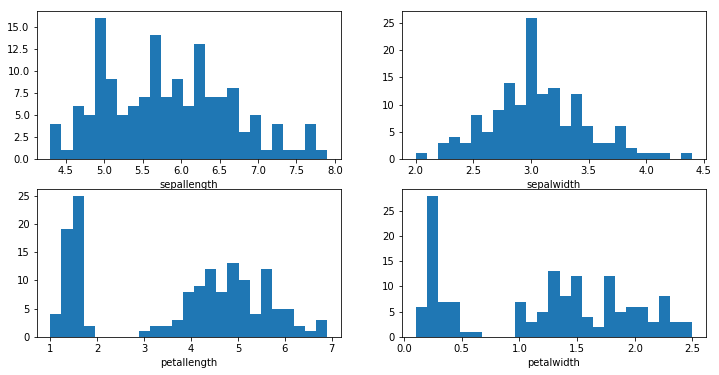

In [214]:
fig,axes = plt.subplots(2,2,figsize=(12,6))

for ax,i in zip(axes.ravel(),range(4)):
    ax.hist(X[:,i],bins=25)
    ax.set_xlabel(iris.columns.tolist()[i])


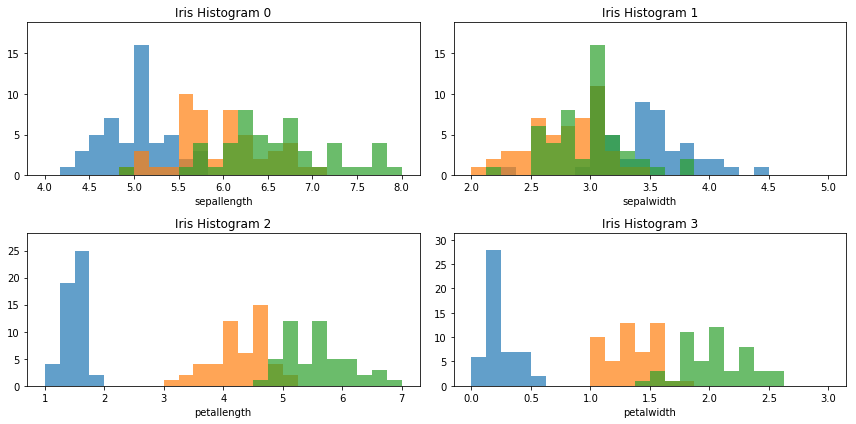

In [215]:
fig,axes = plt.subplots(2,2,figsize=(12,6))

for ax,i in zip(axes.ravel(),range(0,4)):
    for lab in range(1,4):
        bins =np.linspace(math.floor(np.min(X[:,i])),math.ceil(np.max(X[:,i])),25)  
        #Set bins, we take the minimum and the maximum of the data, then create n 
        #equal bins using linspace. 
        ax.hist(X[y==lab,i],bins=bins,alpha=.7)
        
    #Increase white space above plot    
    ylims = ax.get_ylim()
    ax.set_ylim([0, max(ylims)+2])
    
    #Set label and Plot Title
    ax.set_xlabel(iris.columns.tolist()[i])
    ax.set_title("Iris Histogram %s" %str(i))
    
    #Get Legend
    ax.legend(loc='upper right', fancybox=True, fontsize=8)

#Checks if any plot elements are overlapping or outsied the figure.    
fig.tight_layout()
    

In [263]:
#Computing the d-dimensional mean vector
#Since we have three classes and 4 dimensions, we get a 3X4 array.
#First Row gives the mean of all columns for data belonging to class 1.

np.set_printoptions(precision=4)
vec = []
meanvec = []

for cl in range(1,4):
    for i in range(4):
        vec.append(X[y==cl,i].mean(axis=0)) 
    meanvec.append(vec)
    vec= []

meanvec = np.array(meanvec)

In [264]:
print(meanvec)
meanvec.shape

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]


(3, 4)

In [273]:
meanvec[0]

array([ 5.006,  3.418,  1.464,  0.244])

In [ ]:
#Computing the Total Within class Scatter Matrix Sw.
#Which is the Summation of the Scatter Matrix of each of the classes, so in this case S1+S2+S3
#In general when calculating the matrices we assume that each feature vector is a row,
#hence we do (X-meanvec) dot Transpose(X-meanvec) but since our X has feature vectors as columns,
#we do the opposite i.e scattermat = Transpose(X-meanvec) dot (X-meanvec).

sw = np.zeros((4,4))
for cl in range(1,4):
    scatmat = np.dot(((X[y==cl]-meanvec[cl-1]).T),(X[y==cl]-meanvec[cl-1]))
    sw+= scatmat

In [312]:
sw

array([[ 38.9562,  13.683 ,  24.614 ,   5.6556],
       [ 13.683 ,  17.035 ,   8.12  ,   4.9132],
       [ 24.614 ,   8.12  ,  27.22  ,   6.2536],
       [  5.6556,   4.9132,   6.2536,   6.1756]])

In [337]:
#Computing the Between Scatter Matrix
sb = np.zeros((4,4))
overallmean = np.mean(X,axis=0).reshape(4,1)


for cl in range(1,4):
    betscatmat =len(X[y==cl])*np.dot((meanvec[cl-1].reshape(4,1)-overallmean),(meanvec[cl-1].reshape(4,1)-overallmean).T)
    sb += betscatmat



In [338]:
sb

array([[  63.2121,  -19.534 ,  165.1647,   71.3631],
       [ -19.534 ,   10.9776,  -56.0552,  -22.4924],
       [ 165.1647,  -56.0552,  436.6437,  186.9081],
       [  71.3631,  -22.4924,  186.9081,   80.6041]])

Now That we have both the Within class Scatter Matrix and Between class Scatter Matrix,
We solve the EigenValue problem for the matrix $S_{W}^{-1}$$S_{B}$ to obtain the Linear Discriminants.

We do this because we want to maximise the ratio 

$\frac{Between CLass Scatter}{Within CLass Scatter}$, so that different classes of data are as farther apart as possible and we also minimse the scatter within the classes. 

In [433]:
eigvals,eigvecs = np.linalg.eig(np.dot(np.linalg.inv(sw),sb))

In [434]:
print(eigvecs.real)
print(eigvals.real)

[[-0.2049 -0.009   0.6834  0.6834]
 [-0.3871 -0.589  -0.1589 -0.1589]
 [ 0.5465  0.2543 -0.125  -0.125 ]
 [ 0.7138 -0.767  -0.3594 -0.3594]]
[  3.2272e+01   2.7757e-01  -2.4444e-15  -2.4444e-15]


In [435]:
np.set_printoptions(precision=4)

for i in range(0,4):
    print("EigenVector {}, \n {}".format(i+1,eigvecs[:,i].real.reshape(4,1)))
    print("Eigen Value: {} \n".format(eigvals.real[i]))

EigenVector 1, 
 [[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigen Value: 32.27195779972986 

EigenVector 2, 
 [[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigen Value: 0.2775668638400537 

EigenVector 3, 
 [[ 0.6834]
 [-0.1589]
 [-0.125 ]
 [-0.3594]]
Eigen Value: -2.4444407463775655e-15 

EigenVector 4, 
 [[ 0.6834]
 [-0.1589]
 [-0.125 ]
 [-0.3594]]
Eigen Value: -2.4444407463775655e-15 



The Eigen Vectors form the new axes in our new feature subspace and the corresponding eigen values 
tell us how informative the new axes are.
The Eigen Vectors with the lowest values provide us with the least information, so the best practice is to select Eigen Vectors with the highest values.

In [454]:
eigpairs = [(np.abs(eigvals[i]),eigvecs[:,i]) for i in range(len(eigvals))]
eigpairs

[(32.271957799729861,
  array([-0.2049+0.j, -0.3871+0.j,  0.5465+0.j,  0.7138+0.j])),
 (0.27756686384005369,
  array([-0.0090+0.j, -0.5890+0.j,  0.2543+0.j, -0.7670+0.j])),
 (3.9969886852891346e-15,
  array([ 0.6834+0.j    , -0.1589-0.2032j, -0.1250-0.245j , -0.3594+0.5114j])),
 (3.9969886852891346e-15,
  array([ 0.6834-0.j    , -0.1589+0.2032j, -0.1250+0.245j , -0.3594-0.5114j]))]

In [476]:
sortedpairs = sorted(eigpairs, key= lambda k: k[0],reverse=True)
[sortedpairs[row][0] for row in range(len(sortedpairs))]

[32.271957799729861,
 0.27756686384005369,
 3.9969886852891346e-15,
 3.9969886852891346e-15]

The eigenvalues of the last two eigenvectors is almost zero, they are in fact zero.
In LDA the number of Linear Discriminants is at most c-1, where c is the number of class labels. 
Now let's look at the percentage of variance explained by these eigenvectors.

In [517]:
varexp =np.abs(eigvals.real*100)/sum(eigvals.real)
for i in range(len(varexp)):
    print("%.2f %%"  % varexp[i])b
        

99.15 %
0.85 %
0.00 %
0.00 %


In [526]:
varexp

array([  9.9147e+01,   8.5275e-01,   7.5099e-15,   7.5099e-15])

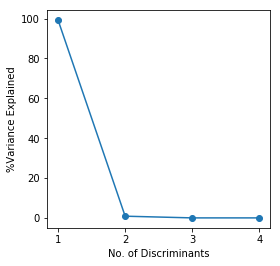

In [572]:
fig =plt.figure(figsize=(4,4))
plt.scatter(range(1,5),varexp)
plt.plot(range(1,5),varexp)
plt.xlabel("No. of Discriminants")
plt.ylabel("%Variance Explained")
fig=plt.xticks(range(1,5))

We can see that the first eigenvector is the most informative. 
Let's use the first two eigen vectors to transform the original Data.

In [609]:
W =np.concatenate((eigpairs[0][1].real.reshape(4,1),eigpairs[1][1].real.reshape(4,1)),axis=1)
print(W)

[[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


Now we transform our data into this new subspace using 
Y = X * W

In [611]:
X_lda = np.dot(X,W)
X_lda.shape

(150, 2)

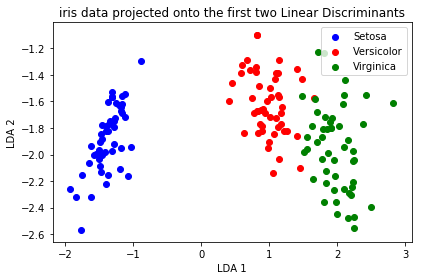

In [671]:
#Plotting the two New features i.e. the Linear Discriminants.
fig= plt.figure(figsize=(6,4))
for cl,color,label in zip(range(1,4),("blue","red","green"),("Setosa","Versicolor","Virginica")):
    plt.scatter(X_lda[y==cl,0],X_lda[y==cl,1],c=color,label=label)
    
plt.legend(loc="upper right",fancybox=True)    
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.title("iris data projected onto the first two Linear Discriminants")
plt.tight_layout()

Comparing LDA and PCA,
While PCA finds the axes in the subspace that maximise the variance of the data, LDA finds the axes which maximise the separation between classes. 
LDA is supervised since it uses the class labels to maximise separation between them while PCA is unsupervised. 

In [716]:
#Import PCA and LDA from sklearn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [711]:
#PCA

#Create a PCA instance
pca = PCA(n_components=2)

#Fit the X data to find the Principal components and transform the original d-dimensional data
#into the smaller subspace
X_pca=pca.fit_transform(X)

X_pca.shape

(150, 2)

In [720]:
#LDA

#Create an LDA instance
lda = LinearDiscriminantAnalysis(n_components=2)

#Fit the X data to find the Linear Discriminants and transform the original d-dimensional data
#into the smaller subspace
X_lda2=lda.fit_transform(X,y)
X_lda2.shape

(150, 2)

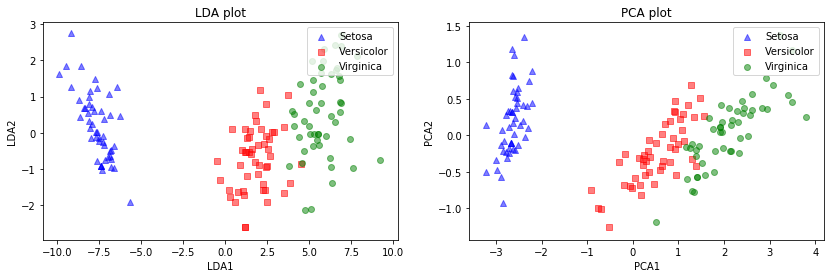

In [727]:
#Side by Side comparison of both the plots of LDA and PCA.

fig,axes = plt.subplots(1,2,sharex="col",figsize=(14,4))
for cl,color,marker,label in zip(range(1,4),("blue","red","green"),('^','s','o'),
                                 ("Setosa","Versicolor","Virginica")):
    axes[0].scatter(X_lda2[y==cl,0],X_lda2[y==cl,1],c=color,marker=marker,label=label,alpha=.5)
    
axes[0].set_xlabel("LDA1")    
axes[0].set_ylabel("LDA2")    
axes[0].set_title("LDA plot")
axes[0].legend(loc="upper right",fancybox=True)   
#axes[0].set_ylim(-2.6,-1.2)


for cl,color,marker,label in zip(range(1,4),("blue","red","green"),('^','s','o'),
                                 ("Setosa","Versicolor","Virginica")):
    axes[1].scatter(X_pca[y==cl,0],X_pca[y==cl,1],c=color,marker=marker,label=label,alpha=.5)

axes[1].set_xlabel("PCA1")    
axes[1].set_ylabel("PCA2")    
axes[1].set_title("PCA plot")
axes[1].legend(loc="upper right",fancybox=True)    
#axes[1].set_ylim(-1,1.5)    

From the above plot we can clearly see that LDA does a better job of seperating the classes while PCA transforms the axes along the directions of most variance in the entire data. 

Feature Scaling such as normalisation or standardization does not change the overall results of LDA, though the Eigen Vectors and the scatter Matrices will change, the eigen values remain the same and the projections also look similar except for different scaling of the axes.